<a href="https://colab.research.google.com/github/lifahjdm/Cat-and-Dog-Classification/blob/main/UAS_Deep_Learning_Klasifikasi_Kucing_dan_Anjing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS DEEP LEARNING
# Nama : Umi Nur Kholifah
# NIM : 41521120007


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [68]:
import zipfile

zip_files = ['sampel', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile(f'/content/drive/MyDrive/Kaggle/PetImages.zip'.format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

sampel unzipped
train unzipped


In [69]:
CAT_TRAIN_DIR_PATH = '/content/PetImages/Cat'
DOG_TRAIN_DIR_PATH = '/content/PetImages/Dog'
cat = os.listdir(CAT_TRAIN_DIR_PATH)
dog = os.listdir(DOG_TRAIN_DIR_PATH)
file_names = cat + dog

print('Terdapat {} file gambar.'. format(len(file_names)))

Terdapat 24961 file gambar.


In [70]:
def to_dataframe(cat_path, dog_path):
    files, labels = [], []

    for file_name in os.listdir(cat_path):
        full_path = os.path.join('Cat', file_name)
        files.append(full_path)
        labels.append('cat')

    for file_name in os.listdir(dog_path):
        full_path = os.path.join('Dog', file_name)
        files.append(full_path)
        labels.append('dog')

    return pd.DataFrame({'file_name': files, 'label': labels})

# Buat dataframe
df = to_dataframe(CAT_TRAIN_DIR_PATH, DOG_TRAIN_DIR_PATH)

# Tampilkan hasil
print(f'Total file: {len(df)}')
display(df.head())

Total file: 24961


,file_name,label
0,Cat/7307.jpg,cat
1,Cat/10170.jpg,cat
2,Cat/7068.jpg,cat
3,Cat/10876.jpg,cat
4,Cat/4514.jpg,cat


In [71]:
df

,file_name,label
0,Cat/7307.jpg,cat
1,Cat/10170.jpg,cat
2,Cat/7068.jpg,cat
3,Cat/10876.jpg,cat
4,Cat/4514.jpg,cat
...,...,...
24956,Dog/11333.jpg,dog
24957,Dog/4881.jpg,dog
24958,Dog/1730.jpg,dog
24959,Dog/2527.jpg,dog


Pembagian Tabel pada data set:
 label
cat    12491
dog    12470
Name: count, dtype: int64


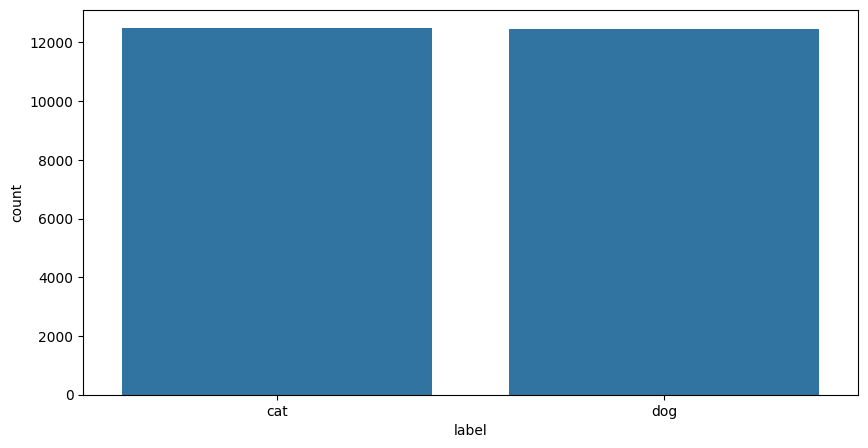

In [72]:
print('Pembagian Tabel pada data set:\n',df['label'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x=df['label'])
plt.show()

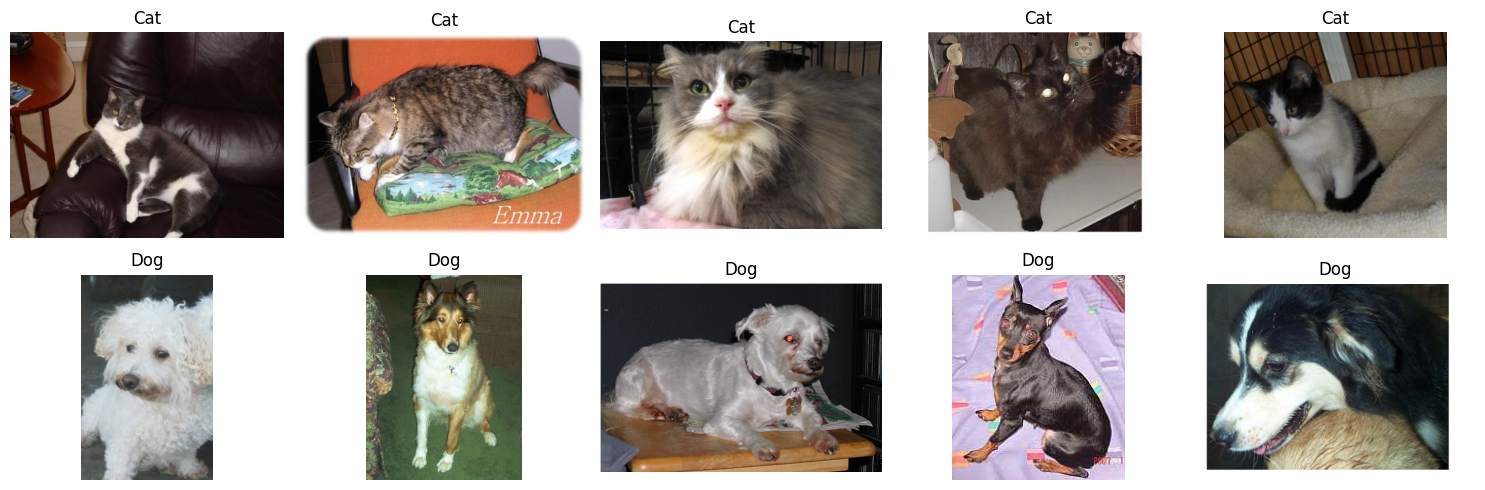

In [73]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Tentukan direktori dasar (root dari folder Cat/Dog)
BASE_DIR = '/content/PetImages'

# Ambil 5 sampel acak dari masing-masing label
sample_cats = df[df['label'] == 'cat'].sample(5)
sample_dogs = df[df['label'] == 'dog'].sample(5)

# Buat plot
plt.figure(figsize=(15, 5))

# Tampilkan gambar kucing
for i, row in enumerate(sample_cats.itertuples(), start=1):
    img_path = os.path.join(BASE_DIR, row.file_name)
    try:
        image = mpimg.imread(img_path)
        plt.subplot(2, 5, i)
        plt.imshow(image)
        plt.title("Cat")
        plt.axis('off')
    except Exception as e:
        print(f"Gagal membaca file gambar {img_path}: {e}")

# Tampilkan gambar anjing
for i, row in enumerate(sample_dogs.itertuples(), start=6):
    img_path = os.path.join(BASE_DIR, row.file_name)
    try:
        image = mpimg.imread(img_path)
        plt.subplot(2, 5, i)
        plt.imshow(image)
        plt.title("Dog")
        plt.axis('off')
    except Exception as e:
        print(f"Gagal membaca file gambar {img_path}: {e}")

plt.tight_layout()
plt.show()


In [74]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji
train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

print("Shape of training set:", train_df.shape)
print("Shape of test set:", test_df.shape)

Shape of training set: (19968, 2)
Shape of test set: (4993, 2)


Pembagian data train :
 label
dog    9988
cat    9980
Name: count, dtype: int64
Pembagian data test :
 label
cat    2511
dog    2482
Name: count, dtype: int64



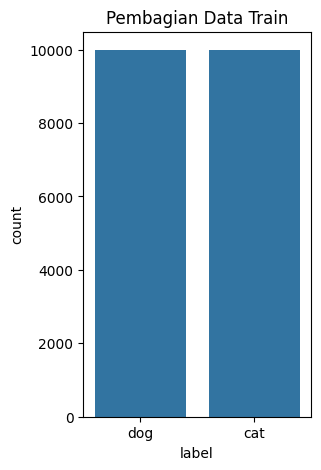

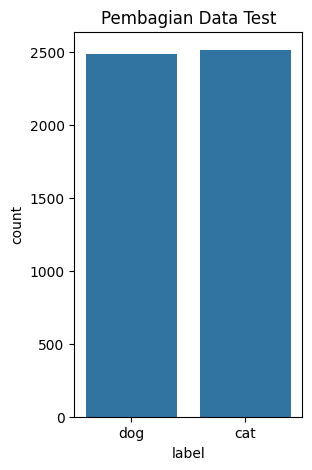

In [75]:
print('Pembagian data train :\n', train_df['label'].value_counts())
print('Pembagian data test :\n', test_df['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_df['label'], order={'dog','cat'})
plt.title('Pembagian Data Train')

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=test_df['label'], order={'dog','cat'})
plt.title('Pembagian Data Test')
plt.show()

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 100, 100
batch_size = 32

In [77]:
train_datagenerator = ImageDataGenerator(rotation_range=15,
                                         rescale=1./255,
                                         shear_range=0.1,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         width_shift_range=0.1,
                                         height_shift_range=0.1)

train_generator = train_datagenerator.flow_from_dataframe(dataframe=train_df,
                                        directory='/content/PetImages',
                                        x_col='file_name',
                                        y_col='label',
                                        target_size=(WIDTH, HEIGHT),
                                        class_mode='categorical',
                                        batch_size=batch_size)

Found 19967 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


In [78]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=test_df,
                                        directory='/content/PetImages',
                                        x_col='file_name',
                                         y_col='label',
                                        target_size=(WIDTH, HEIGHT),
                                        class_mode='categorical',
                                        batch_size=batch_size)

Found 4992 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


# Arsitektur CNN

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, Adamax, SGD

# Ukuran gambar & jumlah kelas
input_shape = (100, 100, 3)
num_classes = 2


In [80]:
def build_model(optimizer_choice):
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout kedua
    model.add(Dense(num_classes, activation='softmax'))

    # Optimizer selection
    if optimizer_choice == 'rmsprop':
        optimizer = RMSprop()
    elif optimizer_choice == 'adamax':
        optimizer = Adamax()
    elif optimizer_choice == 'sgd':
        optimizer = SGD()
    else:
        raise ValueError("Optimizer not supported")

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [81]:
model_rmsprop = build_model('rmsprop')
model_adamax = build_model('adamax')
model_sgd = build_model('sgd')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model_rmsprop.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,346 (16.61 MB)

 Trainable params: 4,353,346 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model_adamax.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,346 (16.61 MB)

 Trainable params: 4,353,346 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model_sgd.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,346 (16.61 MB)

 Trainable params: 4,353,346 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def train_model(model, X_train, Y_train, optimizer_name):
    callbacks = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=3,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            f'best_model_{optimizer_name}.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    print(f"=== MEMULAI TRAINING MODEL ({optimizer_name.upper()}) ===")
    history = model.fit(
        X_train, Y_train,
        epochs=6,
        batch_size=32,
        validation_split=0.1,
        callbacks=callbacks,
        verbose=1
    )
    print(f"Training model {optimizer_name.upper()} selesai!\n")
    return history

In [86]:
# Membuat dan melatih model dengan optimizer RMSprop
model_rmsprop = build_model('rmsprop')
print("=== MEMULAI TRAINING MODEL (RMSPROP) ===")
history_rmsprop = model_rmsprop.fit(
    train_generator,
    validation_data=validation_data,
    epochs=6,
    verbose=1
)
print("Training model RMSprop selesai!\n")


# Membuat dan melatih model dengan optimizer Adamax
model_adamax = build_model('adamax')
print("=== MEMULAI TRAINING MODEL (ADAMAX) ===")
history_adamax = model_adamax.fit(
    train_generator,
    validation_data=validation_data,
    epochs=6,
    verbose=1
)
print("Training model Adamax selesai!\n")

# Membuat dan melatih model dengan optimizer SGD
model_sgd = build_model('sgd')
print("=== MEMULAI TRAINING MODEL (SGD) ===")
history_sgd = model_sgd.fit(
    train_generator,
    validation_data=validation_data,
    epochs=6,
    verbose=1
)
print("Training model SGD selesai!\n")

=== MEMULAI TRAINING MODEL (RMSPROP) ===


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.5372 - loss: 0.9052

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 439s 701ms/step - accuracy: 0.5373 - loss: 0.9049 - val_accuracy: 0.7111 - val_loss: 0.5908
Epoch 2/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 432s 692ms/step - accuracy: 0.6649 - loss: 0.6120 - val_accuracy: 0.7346 - val_loss: 0.5334
Epoch 3/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 434s 680ms/step - accuracy: 0.7072 - loss: 0.5733 - val_accuracy: 0.7740 - val_loss: 0.4818
Epoch 4/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 422s 677ms/step - accuracy: 0.7192 - loss: 0.5471 - val_accuracy: 0.7796 - val_loss: 0.4721
Epoch 5/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 434s 695ms/step - accuracy: 0.7450 - loss: 0.5316 - val_accuracy: 0.7796 - val_loss: 0.4741
Epoch 6/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 424s 679ms/step - accuracy: 0.7578 - loss: 0.5073 - val_accuracy: 0.7935 - val_loss: 0.4534
Training model RMSprop selesai!

=== MEMULAI TRAINING MODEL (ADAMAX) ===
Epoch 1/6
624/624 ━━━━━━━━━━━━━━━━━━━━ 433s 690ms/step - accuracy: 0.5253 - loss: 0.7623 - val_accuracy: 0.6609 - val_loss: 0.6552
Epoch 2/6
624/624 ━━

In [87]:
from sklearn.metrics import classification_report

def evaluate_model(model, validation_generator, optimizer_name):
    print(f"\n=== Evaluasi Model ({optimizer_name.upper()}) ===")

    # Predict probabilities
    predictions = model.predict(validation_generator)

    # Convert one-hot to class index
    y_pred = np.argmax(predictions, axis=1)
    y_true = validation_generator.classes  # True class labels

    class_labels = list(validation_generator.class_indices.keys())  # e.g. ['cat', 'dog']

    # Classification report
    report = classification_report(
        y_true, y_pred,
        target_names=class_labels,
        digits=4
    )
    print(report)


In [88]:
evaluate_model(model_rmsprop, validation_data, 'rmsprop')
evaluate_model(model_adamax, validation_data, 'adamax')
evaluate_model(model_sgd, validation_data, 'sgd')


=== Evaluasi Model (RMSPROP) ===
156/156 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step
              precision    recall  f1-score   support

         cat     0.5039    0.5880    0.5427      2510
         dog     0.4988    0.4146    0.4528      2482

    accuracy                         0.5018      4992
   macro avg     0.5014    0.5013    0.4978      4992
weighted avg     0.5014    0.5018    0.4980      4992


=== Evaluasi Model (ADAMAX) ===
  8/156 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


156/156 ━━━━━━━━━━━━━━━━━━━━ 29s 186ms/step
              precision    recall  f1-score   support

         cat     0.5010    0.3829    0.4341      2510
         dog     0.4961    0.6144    0.5490      2482

    accuracy                         0.4980      4992
   macro avg     0.4986    0.4986    0.4915      4992
weighted avg     0.4986    0.4980    0.4912      4992


=== Evaluasi Model (SGD) ===
148/156 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


156/156 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step
              precision    recall  f1-score   support

         cat     0.5106    0.5753    0.5410      2510
         dog     0.5074    0.4424    0.4727      2482

    accuracy                         0.5092      4992
   macro avg     0.5090    0.5088    0.5068      4992
weighted avg     0.5090    0.5092    0.5070      4992



1. Model dengan optimizer SGD menunjukkan performa terbaik secara keseluruhan, meskipun perbedaannya tidak signifikan. Model ini memiliki skor tertinggi untuk semua metrik utama: accuracy, precision, recall, dan f1-score (semua > 0.50).

2. Model RMSprop berada di posisi kedua, dengan performa yang sedikit di bawah SGD. Model ini cenderung lebih baik dalam mengenali kelas cat (recall cat: 0.5880) dibandingkan Adamax.

3. Model Adamax justru memiliki bias terhadap kelas dog, terlihat dari recall dog yang tinggi (0.6144), tetapi rendah dalam mengenali kelas cat (recall cat: hanya 0.3829). Hal ini menghasilkan f1-score yang tidak seimbang.

4. Ketiga model masih memiliki performa mendekati random guess (sekitar 50%), yang menunjukkan bahwa:
- Data mungkin masih mengandung noise, misalnya gambar corrupt atau tidak representatif.
- Model arsitektur bisa ditingkatkan (misalnya menambah lebih banyak layer atau tuning hyperparameter).
- Perlu augmentasi atau balancing data yang lebih baik.

In [89]:
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title(f'{model_name.upper()} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'{model_name.upper()} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

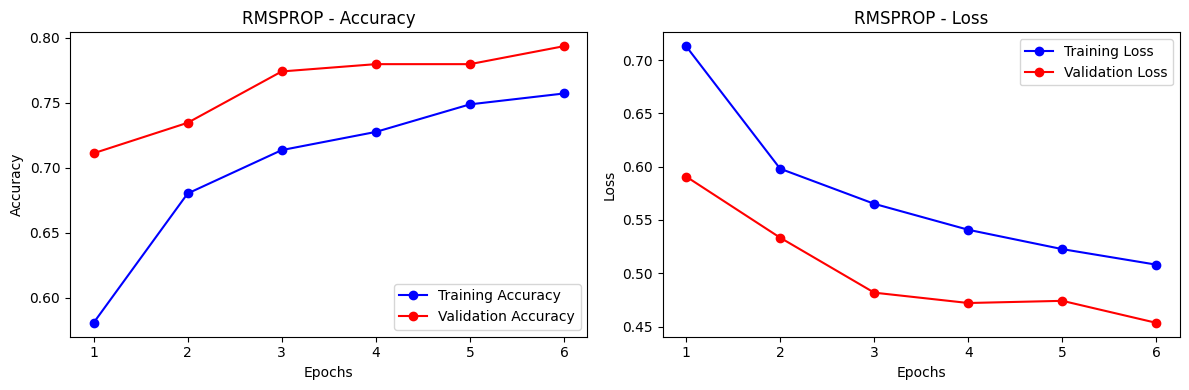

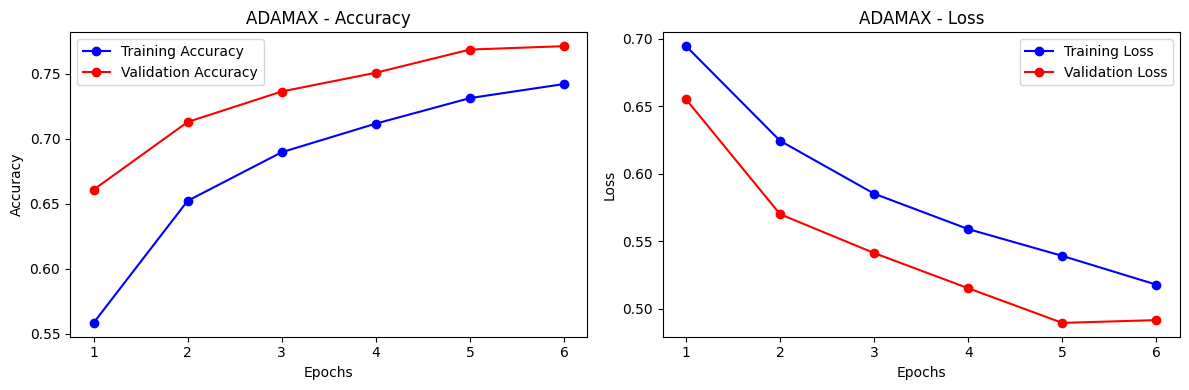

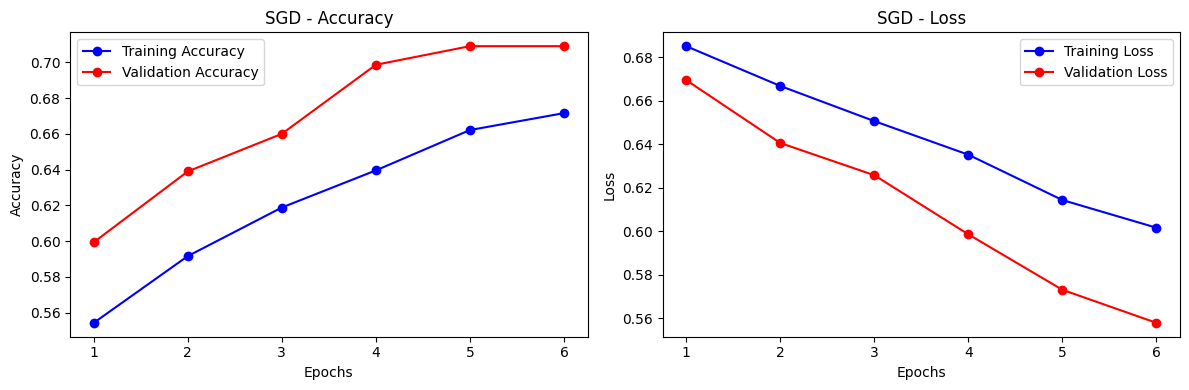

In [90]:
plot_training_history(history_rmsprop, 'rmsprop')
plot_training_history(history_adamax, 'adamax')
plot_training_history(history_sgd, 'sgd')


**1. Model dengan Optimizer RMSprop**

Model yang menggunakan optimizer RMSprop menunjukkan performa yang cukup stabil dan konsisten. Terlihat bahwa akurasi training meningkat secara bertahap dari sekitar 58% ke 75%, sementara akurasi validasi meningkat dari 71% ke hampir 80%. Ini mengindikasikan bahwa model mampu belajar dengan baik dan menggeneralisasi terhadap data yang belum pernah dilihat. Grafik loss juga memperkuat temuan ini; baik training loss maupun validation loss menurun cukup drastis, meskipun pada epoch ke-5 dan ke-6 terlihat bahwa validation loss mulai stagnan. Hal ini bisa mengindikasikan bahwa model mulai mendekati titik optimal, namun perlu diawasi agar tidak overfitting.

**2. Model dengan Optimizer Adamax**

Model yang dilatih dengan optimizer Adamax juga menunjukkan peningkatan performa yang stabil dari waktu ke waktu. Akurasi training naik dari 55% ke 74%, dan akurasi validasi meningkat dari 66% ke hampir 77% dalam 6 epoch. Grafik loss juga menunjukkan tren penurunan yang konsisten baik untuk data training maupun validasi, yang menunjukkan bahwa model belajar dengan cukup efisien. Tidak terlihat adanya gap besar antara training dan validation curve, yang berarti tidak ada tanda overfitting yang signifikan. Adamax tampaknya memberikan stabilitas yang baik selama proses pelatihan dan cocok digunakan untuk dataset ini.

**3. Model dengan Optimizer SGD**

Pada model yang menggunakan SGD (Stochastic Gradient Descent), terdapat peningkatan performa namun lebih lambat dibanding dua optimizer sebelumnya. Akurasi training meningkat dari 55% ke 66.7%, sedangkan akurasi validasi naik dari 60% ke 71%. Walaupun ada kemajuan yang konsisten, peningkatannya lebih kecil dan cenderung tertinggal dibanding RMSprop dan Adamax. Hal ini juga terlihat pada loss, di mana training loss dan validation loss menurun secara bertahap, namun tetap berada pada angka yang relatif tinggi dibanding dua model lainnya. Model dengan SGD cenderung lebih lambat dalam konvergensi, dan mungkin memerlukan lebih banyak epoch atau penyesuaian learning rate agar bisa menyamai performa RMSprop atau Adamax.



In [92]:
def print_accuracy(history, model_name):
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    print(f"Akurasi Model: {model_name.upper()}")
    print(f"   - Akurasi Training : {train_acc:.4f}")
    print(f"   - Akurasi Testing  : {val_acc:.4f}\n")

print_accuracy(history_rmsprop, 'rmsprop')
print_accuracy(history_adamax, 'adamax')
print_accuracy(history_sgd, 'sgd')


Akurasi Model: RMSPROP
   - Akurasi Training : 0.7571
   - Akurasi Testing  : 0.7935

Akurasi Model: ADAMAX
   - Akurasi Training : 0.7421
   - Akurasi Testing  : 0.7712

Akurasi Model: SGD
   - Akurasi Training : 0.6717
   - Akurasi Testing  : 0.7091



In [95]:
from tensorflow.keras.preprocessing import image

def predict_image(model, img_path, class_labels, target_size=(150, 150)):
    # Load dan praproses gambar
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Ubah jadi batch

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    # Tampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_class}")
    plt.show()

    return predicted_class


🔍 Model RMSprop:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


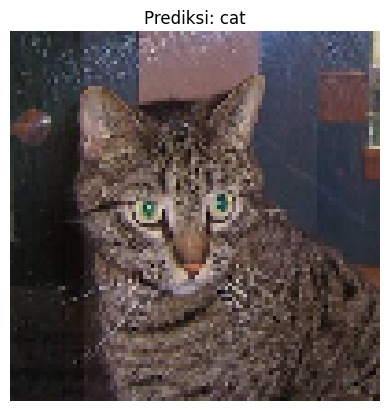

🔍 Model Adamax:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


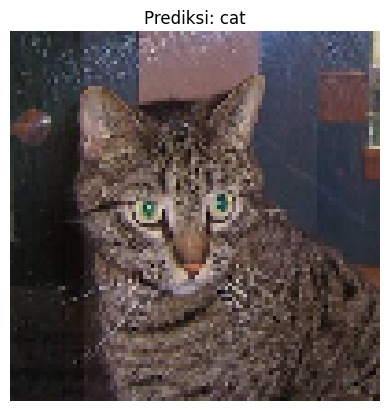

🔍 Model SGD:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


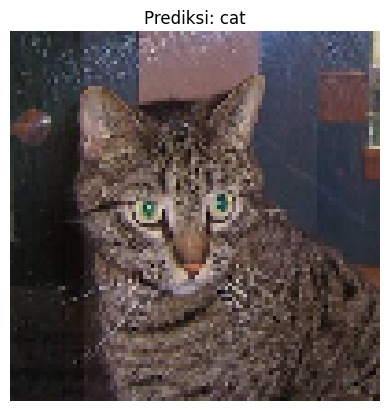

'cat'

In [97]:
# Ganti path ini dengan path file gambar uji kamu (kucing atau anjing)
test_image_path = '/content/PetImages/Cat/1.jpg'

# Label kelas sesuai urutan training generator
class_labels = list(train_generator.class_indices.keys())

# Uji model RMSprop
print("🔍 Model RMSprop:")
predict_image(model_rmsprop, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))

# Uji model Adamax
print("🔍 Model Adamax:")
predict_image(model_adamax, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))

# Uji model SGD
print("🔍 Model SGD:")
predict_image(model_sgd, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))

🔍 Model RMSprop:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


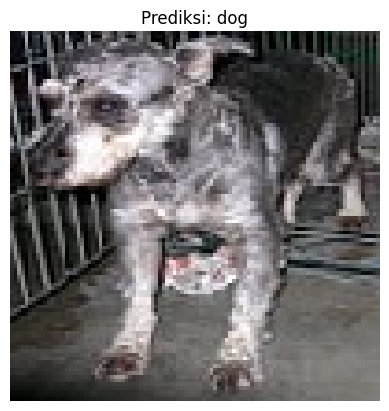

🔍 Model Adamax:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


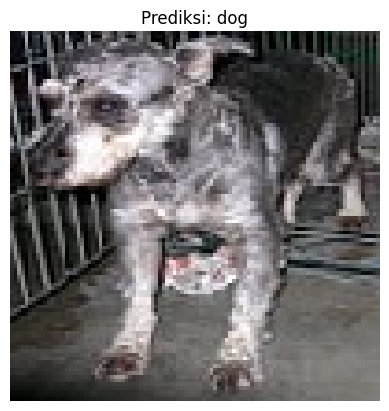

🔍 Model SGD:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


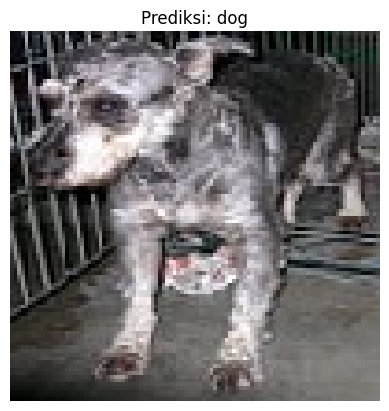

'dog'

In [98]:
# Ganti path ini dengan path file gambar uji kamu (kucing atau anjing)
test_image_path = '/content/PetImages/Dog/10001.jpg'

# Label kelas sesuai urutan training generator
class_labels = list(train_generator.class_indices.keys())

# Uji model RMSprop
print("🔍 Model RMSprop:")
predict_image(model_rmsprop, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))

# Uji model Adamax
print("🔍 Model Adamax:")
predict_image(model_adamax, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))

# Uji model SGD
print("🔍 Model SGD:")
predict_image(model_sgd, test_image_path, class_labels, target_size=(WIDTH, HEIGHT))